In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:/Externship/Housing.csv")

# VISUALIZATIONS

## UNIVARIATE ANALYSIS 

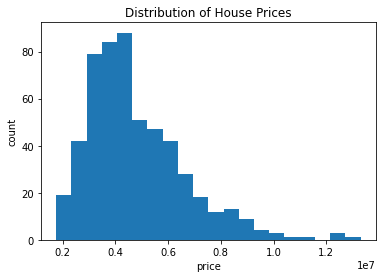

In [5]:
# Histogram for Price
plt.hist(data['price'], bins=20)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Distribution of House Prices')
plt.show()

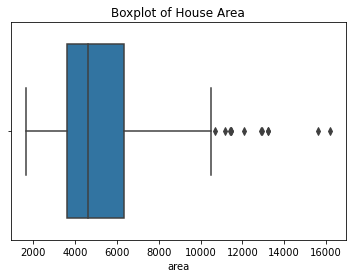

In [6]:
# Boxplot for Area
sns.boxplot(x=data['area'])
plt.xlabel('area')
plt.title('Boxplot of House Area')
plt.show()

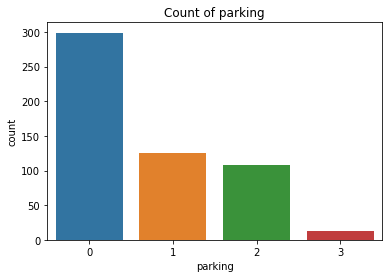

In [8]:
# Countplot for Parking
sns.countplot(x=data['parking'])
plt.xlabel('parking')
plt.ylabel('count')
plt.title('Count of parking')
plt.show()

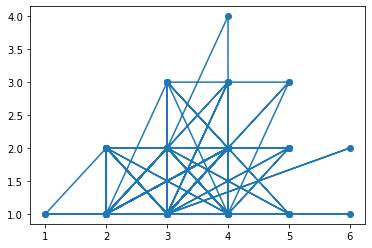

In [22]:
# Line plot
plt.plot(data['bedrooms'],data['bathrooms'])

## BIVARIATE ANALYSIS

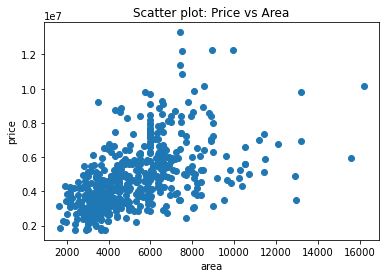

In [11]:
#Scatter plot between price and area
plt.scatter(data['area'], data['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Scatter plot: Price vs Area')
plt.show()

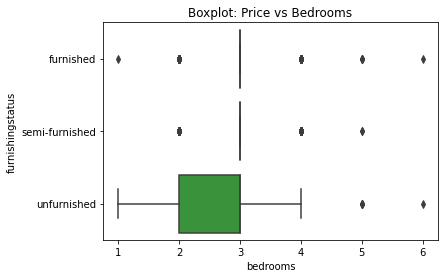

In [12]:
# Boxplot between Price and Bedrooms
sns.boxplot(x=data['bedrooms'], y=data['furnishingstatus'])
plt.xlabel('bedrooms')
plt.ylabel('furnishingstatus')
plt.title('Boxplot: Price vs Furnishingstatus')
plt.show()

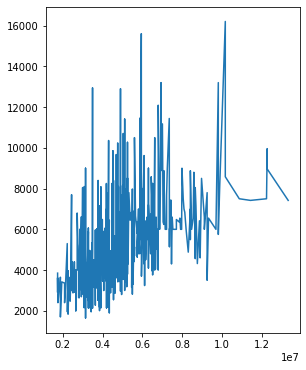

In [19]:
#Subplot
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(data['price'],data['area'])

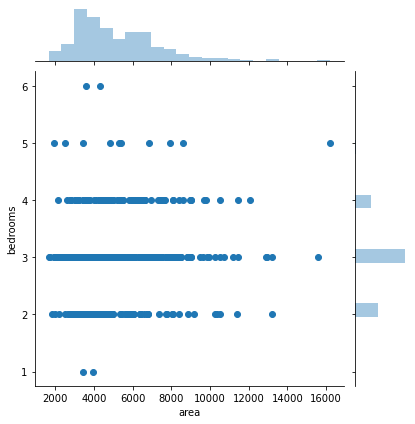

In [20]:
# Joint Plot
sns.jointplot(data.area,data.bedrooms)

## MULTIVARIATE ANALYSIS

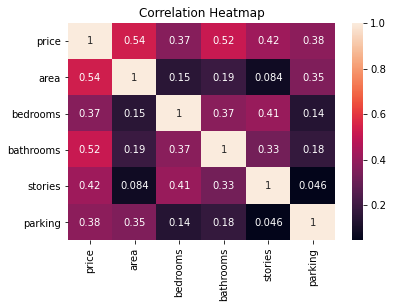

In [15]:
# Correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

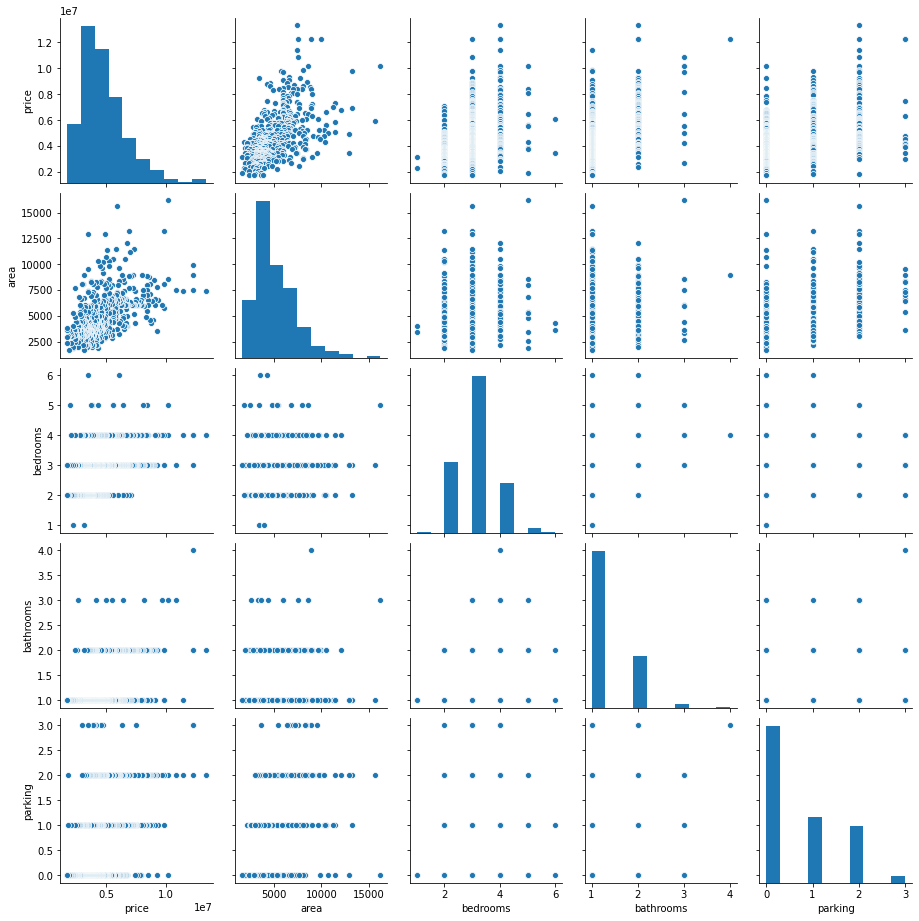

In [18]:
# Creating a scatter plot matrix
subset = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
sns.pairplot(data[subset])
plt.show()

C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\priya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


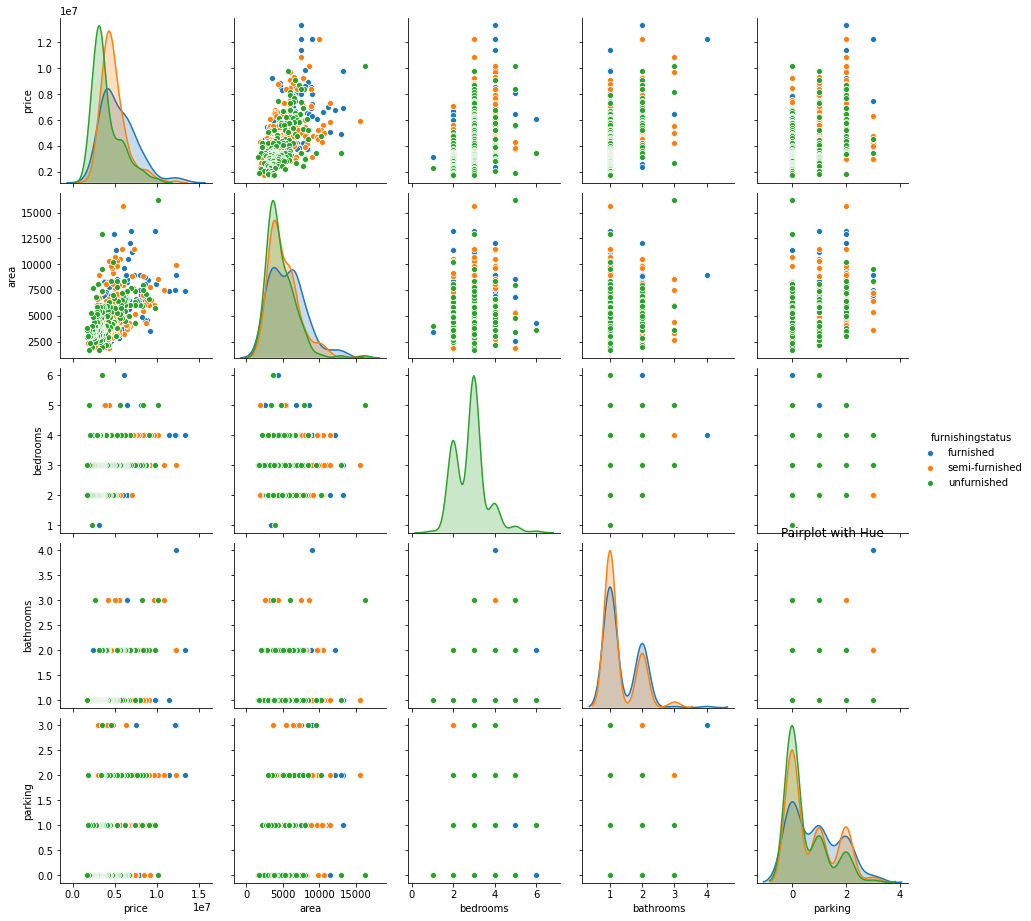

In [24]:
subset = ['price', 'area', 'bedrooms', 'bathrooms', 'parking', 'furnishingstatus']
# Creating a pairplot with hue
sns.pairplot(data[subset], hue='furnishingstatus')
plt.title('Pairplot with Hue')
plt.show()

## PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [27]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


## CHECK FOR MISSING VALUES AND DEAL WITH THEM

In [28]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


## FIND OUTLIERS AND REPLACE THEM

In [45]:
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
z_scores = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()


In [46]:
z_scores

,price,area,bedrooms,bathrooms,parking
0,4.562174,1.045766,1.402131,1.420507,1.516299
1,4.000809,1.755397,1.402131,5.400847,2.676950
2,4.000809,2.216196,0.047235,1.420507,1.516299
3,3.982096,1.082630,1.402131,1.420507,2.676950
4,3.551716,1.045766,1.402131,-0.569663,1.516299
...,...,...,...,...,...
540,-1.575421,-0.990968,-1.307661,-0.569663,1.516299
541,-1.603676,-1.267448,0.047235,-0.569663,-0.805002
542,-1.612845,-0.705273,-1.307661,-0.569663,-0.805002
543,-1.612845,-1.032440,0.047235,-0.569663,-0.805002


In [47]:
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers

,price,area,bedrooms,bathrooms,parking
0,True,False,False,False,False
1,True,False,False,True,False
2,True,False,False,False,False
3,True,False,False,False,False
4,True,False,False,False,False
...,...,...,...,...,...
540,False,False,False,False,False
541,False,False,False,False,False
542,False,False,False,False,False
543,False,False,False,False,False


In [57]:
# Calculate z-scores for each numerical column
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'parking']
z_scores = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

# Define a threshold for outliers (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Replace outliers with median values for each column
for col in numerical_cols:
    median_val = data[col].median()
    data.loc[outliers[col], col] = median_val


In [58]:
data.loc[outliers[col], col]

Series([], Name: parking, dtype: float64)

In [59]:
median_val

0.0

## CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING

In [32]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [33]:
data_encoded

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## SPLIT THR DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [37]:
X = data_encoded.drop('price', axis=1)
Y= data_encoded['price']

In [35]:
X

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,0
3,7500,4,2,2,3,1,0,1,0,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,1,0
542,3620,2,1,1,0,1,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [38]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

## SCALE THE INDEPENDENT VARABLES

In [60]:
from sklearn.preprocessing import StandardScaler
independent_vars = ['area', 'bedrooms', 'bathrooms', 'parking']
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the independent variables and transform the data
data[independent_vars] = scaler.fit_transform(data[independent_vars])


In [61]:
data[independent_vars]

,area,bedrooms,bathrooms,parking
0,1.237672,1.464768,1.760041,1.517692
1,2.036247,1.464768,-0.568169,2.679409
2,2.554802,0.064244,1.760041,1.517692
3,1.279156,1.464768,1.760041,2.679409
4,1.237672,1.464768,-0.568169,1.517692
...,...,...,...,...
540,-1.054343,-1.336280,-0.568169,1.517692
541,-1.365476,0.064244,-0.568169,-0.805741
542,-0.732839,-1.336280,-0.568169,-0.805741
543,-1.101013,0.064244,-0.568169,-0.805741


## SPLIT THE DATA INTO TRAINING AND TESTING

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
X_train, X_test, Y_train, Y_test

(     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
 46   6000         3          2        4        1             1              0   
 93   7200         3          2        1        3             1              0   
 335  3816         2          1        1        2             1              0   
 412  2610         3          1        2        0             1              0   
 471  3750         3          1        2        0             1              0   
 ..    ...       ...        ...      ...      ...           ...            ...   
 71   6000         4          2        4        0             1              0   
 106  5450         4          2        1        0             1              0   
 270  4500         3          2        3        1             1              0   
 435  4040         2          1        1        0             1              0   
 102  5500         3          2        4        1             1              1   
 
      basement

## BUILD THE MODEL

In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
model = LinearRegression()
model


LinearRegression()

## TRAIN THE MODEL

In [70]:
model.fit(X_train, Y_train)


LinearRegression()

## TEST THE MODEL

In [73]:
Y_pred=model.predict(X_test)

In [74]:
Y_pred

array([5258925.99541618, 6718130.9354869 , 3206390.61078682,
       4746637.3331803 , 3417109.03607652, 3688532.64426649,
       5821903.98698924, 5998970.73111102, 2722897.05312342,
       2604646.13552248, 9123702.93576611, 2886443.41171829,
       3134456.01977447, 3463046.6881216 , 3883767.03358578,
       5205836.27646808, 3094402.64909843, 4934276.69762259,
       4587021.22230965, 3701879.6875537 , 5265993.32138883,
       5568826.19292356, 2814395.25514759, 4346622.371208  ,
       5539146.03442006, 7202583.02894951, 3437632.76421889,
       5398110.73586203, 7895446.45813403, 3480358.76570768,
       6035959.57685419, 3410164.9814662 , 6869572.93591009,
       4358864.08644594, 3698347.63676932, 5928918.32132236,
       5081631.13271761, 4577887.63555209, 3171570.78992645,
       4677498.10467741, 4756189.98912228, 3605638.17867785,
       6697906.89153723, 4109495.48286034, 3891480.09958185,
       4403692.57341579, 6862300.25259125, 4185359.05934612,
       3926970.47292875,

## MEASURE THE PERFORMANCE USING METRICS

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 988116.1632405709


In [81]:
mse = mean_squared_error(Y_test, Y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1837637189871.703


In [82]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1355594.7734746188
